<div id="BBox" class="alert alert-warning" style="font-family:courier;color:black;justify-content:left;">
<h1>Introduction to Scikit-learn</h1>
Scikit-learn is a powerful and widely-used <u>open-source machine learning library for Python that provides a comprehensive suite of tools for data mining and data analysis </u>. It offers a user-friendly interface and a range of efficient algorithms for <u>classification, regression, clustering, and dimensionality reduction, as well as tools for model evaluation and selection </u>. Built on top of other scientific libraries such as NumPy, SciPy, and Matplotlib, scikit-learn simplifies the implementation of machine learning workflows, making it accessible for both beginners and experienced practitioners. With extensive documentation and a large community, it serves as a cornerstone for developing machine learning applications in various domains, from academia to industry.

</div>

In [176]:
# Code cell
# !pip install scikit-learn


In [177]:
import pandas as pd 
data = pd.read_csv(r"dataset/House_Rent_Dataset.csv")
data.head(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
6,2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
7,2022-06-21,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent
8,2022-06-07,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent
9,2022-06-20,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner


In [178]:
import numpy as np

rent = np.array(data['Rent'].values,dtype=np.float32)
aprtmt_size = np.array([[item] for item in data['Size'].values], dtype=np.float32)

print(rent.shape, aprtmt_size.shape)
print(aprtmt_size.shape)

print(rent[0:10])
print(aprtmt_size[0:10])

(4746,) (4746, 1)
(4746, 1)
[10000. 20000. 17000. 10000.  7500.  7000. 10000.  5000. 26000. 10000.]
[[1100.]
 [ 800.]
 [1000.]
 [ 800.]
 [ 850.]
 [ 600.]
 [ 700.]
 [ 250.]
 [ 800.]
 [1000.]]


<div id="BBox" class="alert alert-warning" style="font-family:courier;color:black;justify-content:left;">
<h3>Data preprocessing</h3>
<ul>
<li>
<strong>Method:</strong>
`StandardScaler` 
</li>
<li><strong> Usage: </strong>
Transforms data to have mean 0 and standard deviation 1.
</li>
<li><strong>Importance: </strong>
Helps to standardize features for models sensitive to scale.
</li>
</ul>
</div>

In [179]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(aprtmt_size)
print("Mean:",scaler.mean_)
print("Variance:",scaler.var_)
print(scaled_data.shape)

rent = np.reshape(rent, (rent.shape[0], 1))
print(rent.shape)


Mean: [967.49072903]
Variance: [402127.84452003]
(4746, 1)
(4746, 1)


<div id="BBox" class="alert alert-warning" style="font-family:courier;color:black;justify-content:left;">
<h3>Data Splitting</h3>
<ul>
<li>
<strong>Method:</strong>
`train_test_split`
</li>
<li><strong> Usage: </strong>
Splits data into training and testing sets.
</li>
<li><strong>Importance: </strong>
 Ensures models are evaluated on unseen data.
</li>
</ul>
</div>

In [180]:
# Code cell: Splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(aprtmt_size, rent, test_size=0.3, random_state=42)

print("Training Population:", X_train.shape, y_train.shape)
print("Testing Population:", X_test.shape, y_test.shape)


Training Population: (3322, 1) (3322, 1)
Testing Population: (1424, 1) (1424, 1)


<div id="BBox" class="alert alert-warning" style="font-family:courier;color:black;justify-content:left;">
<h3><a href = "https://scikit-learn.org/stable/modules/linear_model.html"> Linear Regression </a></h3>
<ul>
<li>
<strong>Method:</strong>
`LinearRegression`
</li>
<li><strong> Usage: </strong>
Predicts continuous target variables.
</li>
<li><strong>Importance: </strong>
 Fundamental algorithm for regression tasks.
</li>
</ul>

</div>

In [181]:
# Code cell: Linear Regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)


In [182]:
y_pred = reg.predict(X_test)

print(y_test[0:5])
print(y_pred[0:5])

[[16000.]
 [12000.]
 [28000.]
 [ 8000.]
 [46000.]]
[[42030.61 ]
 [26902.41 ]
 [12681.902]
 [62201.543]
 [99265.64 ]]


<div id="BBox" class="alert alert-warning" style="font-family:courier;color:black;justify-content:left;">
<h3><a href = "https://scikit-learn.org/1.5/modules/generated/sklearn.cluster.KMeans.html"> KMeans Clustering </a></h3>
<ul>
<li>
<strong>KMeans:</strong>
is an unsupervised clustering algorithm used to partition a dataset into distinct clusters.
</li>
<li><strong> Goal: </strong>
 Group similar data points together based on features, without needing labeled data.
</li>
<li><strong>Applications: </strong>
 Customer segmentation, pattern recognition, document clustering, etc.
</li>
</ul>

</div>

In [183]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the wine dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Display the first few rows of the dataset
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [184]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


d:\Program_Files\anaconda3\envs\tf_2.2\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


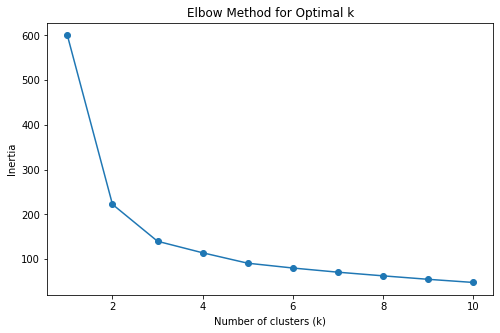

In [185]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method to find the optimal number of clusters
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [186]:
# Applying KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)
# Add actual target labels to compare with clusters
df['Actual'] = iris.target

# print(np.min(df['Cluster']), np.max(df['Cluster']))


In [187]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster,Actual
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0


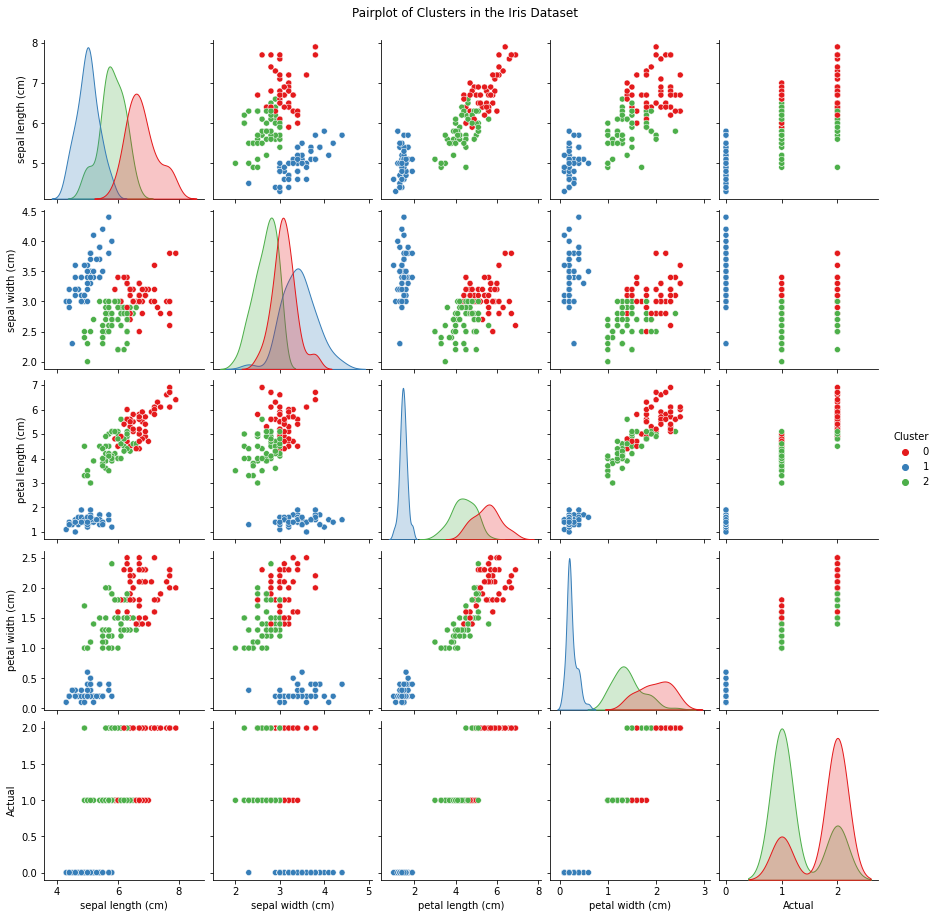

In [188]:
import seaborn as sns

# Pairplot to visualize clustering
sns.pairplot(df, hue='Cluster', palette='Set1')
plt.suptitle("Pairplot of Clusters in the Iris Dataset", y=1.02)
plt.show()


In [189]:
# Save dataframe to xl
df.to_excel("dataset/iris_output.xlsx",
             sheet_name='iris_output', index= False)  

In [190]:
# calculate error using the error matrix
vector1 = np.array([1, 0, 1, 1])
vector2 = np.array([1, 1, 0, 1])
hamming_distance = np.mean(vector1 != vector2)
print(hamming_distance)


vector1 = df['Actual']
vector2 = df['Cluster']
hamming_distance = np.mean(vector1 != vector2)
print("Clustering Error: ", hamming_distance)

0.5
Clustering Error:  0.9066666666666666
